In [1]:
import os
import pandas as pd
import sys

sys.path.append("..")
from pathlib import Path

notebook_path = Path().resolve()
current_dir = notebook_path.parent
report_path = os.path.join(current_dir, "report")

reporting_data_path = os.path.join(report_path, "data")


In [4]:
## Reporting helpers ##
# daily experiment results #
exp1_results = os.path.join(reporting_data_path, "account_values.csv")
exp2_results = os.path.join(reporting_data_path, "ft_account_values.csv")
exp3_results = os.path.join(reporting_data_path, "sen_account_values_norm.csv")
exp3b_results = os.path.join(reporting_data_path, "sen_account_values.csv")

# Print partial view #
from report.utils.viewer import summarize_windows

summarize_windows(exp3_results)


      date  account_value  daily_return  daily_volatility  fear_greed  fear_greed_norm  fear_greed_mapped  window
2021-08-03   1.000000e+06      0.000000          0.000000          -1            -1.00                  0       1
2021-08-04   1.016785e+06      0.016785      18030.962853          42            -0.16                 -1       1
2021-08-05   1.041547e+06      0.024353      18544.635792          50             0.00                  1       1
   ...
      date  account_value  daily_return  daily_volatility  fear_greed  fear_greed_norm  fear_greed_mapped  window
2021-10-30   1.580359e+06     -0.015054      28060.104876          73             0.46                  1       1
2021-10-31   1.567283e+06     -0.008274      27805.310419          74             0.48                  1       1
      date  account_value  daily_return  daily_volatility  fear_greed  fear_greed_norm  fear_greed_mapped  window
2021-10-03   1.000000e+06      0.000000          0.000000          -1            

In [3]:
""" Descriptive analysis  """
"""
NOTES
- Stats and Correlations generated by reports/desc_analysis.py
- Results combined in Correlaitons.csv (drive) 
"""
reporting_results_path = os.path.join(report_path, "results")

voltur_stats_file = os.path.join(reporting_results_path, "voltur_wind_stats.csv")
## file for per-window correlation values 
voltur_corr_file =  os.path.join(reporting_results_path, "voltur_correlations.csv") 

In [5]:
""" Paired comparison per metric Fear & Greed data types """
from report.utils.comparison_analysis import compare_all_metrics, compare_experiments

sentiment_metrics = os.path.join(reporting_data_path, "performance_metrics.csv")
sentiment_metrics_df = pd.read_csv(sentiment_metrics)

windows = sentiment_metrics_df["window"].values
metrics_dict = {
    "annualized_sharpe": (sentiment_metrics_df["Exp.3a-annualized_sharpe"], sentiment_metrics_df["Exp.3b-annualized_sharpe"]),
    "annualized_volatility": (sentiment_metrics_df["Exp.3a-annualized_volatility"], sentiment_metrics_df["Exp.3b-annualized_volatility"]),
    "annualized_sortino": (sentiment_metrics_df["Exp.3a-annualized_sortino"], sentiment_metrics_df["Exp.3b-annualized_sortino"]),
    "max_drawdown": (sentiment_metrics_df["Exp.3a-max_drawdown"], sentiment_metrics_df["Exp.3b-max_drawdown"]),
    "total_return-annualized": (sentiment_metrics_df["Exp.3a-total_return-annualized"], sentiment_metrics_df["Exp.3b-total_return-annualized"])
}
# Run all comparisons
summary_df = compare_all_metrics(metrics_dict, windows=windows, experiment_name="Fear & Greed Normalised vs Mapped", save_csv=False, save_plots=True)

print(summary_df)


                    metric  mean_diff  median_diff  positive_windows  \
0        annualized_sharpe   0.171914    -0.007038                10   
1    annualized_volatility  -0.019402    -0.009174                 8   
2       annualized_sortino   0.329455     0.050519                11   
3             max_drawdown  -0.017256    -0.012620                 8   
4  total_return-annualized  -0.246536    -0.003750                10   

   negative_windows    t_stat   p_value  
0                12  0.819632  0.421631  
1                14 -0.811188  0.426356  
2                11  0.953908  0.350983  
3                14 -1.477242  0.154452  
4                12 -0.748973  0.462181  


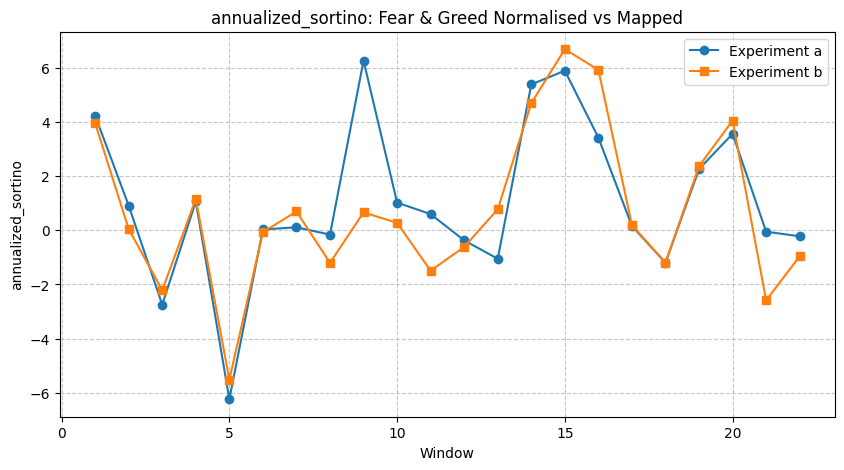

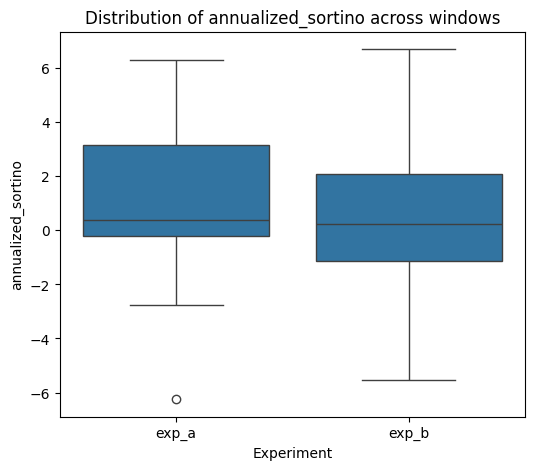

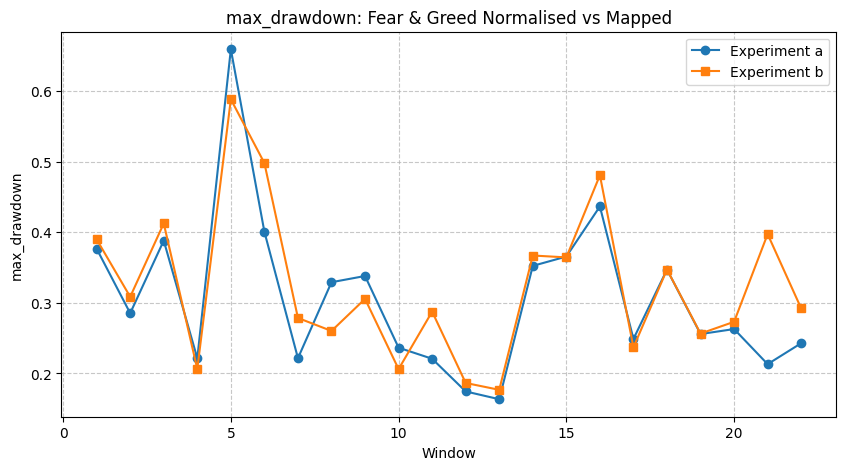

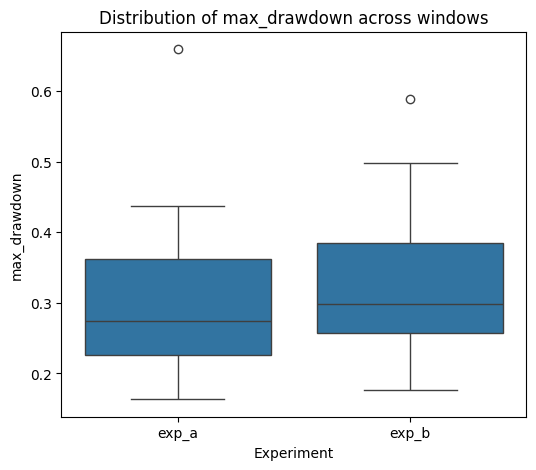

{'metric': 'max_drawdown',
 'mean_diff': np.float64(-0.017255614300000006),
 'median_diff': np.float64(-0.012620091799999997),
 'positive_windows': 8,
 'negative_windows': 14,
 't_stat': np.float64(-1.4772417182168152),
 'p_value': np.float64(0.15445174978587745)}

In [6]:
""" CONT...Paired comparison per metric Fear & Greed data types """

from report.utils.comparison_analysis import compare_experiments

sortino3a = sentiment_metrics_df["Exp.3a-annualized_sortino"]
sortino3b = sentiment_metrics_df["Exp.3b-annualized_sortino"]

compare_experiments(expA=sortino3a, expB=sortino3b, metric_name="annualized_sortino", experiment_name="Fear & Greed Normalised vs Mapped", windows=None, save_plots=False ) 

maxd3a = sentiment_metrics_df["Exp.3a-max_drawdown"]
maxd3b = sentiment_metrics_df["Exp.3b-max_drawdown"]
compare_experiments(expA=maxd3a, expB=maxd3b, metric_name="max_drawdown", experiment_name="Fear & Greed Normalised vs Mapped", windows=None, save_plots=False ) 


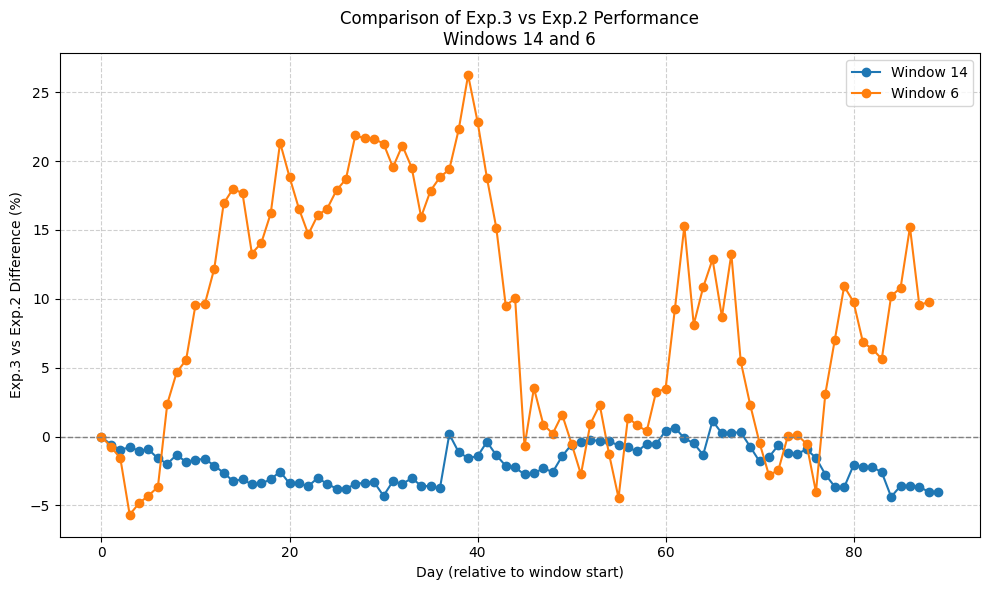

In [5]:
""" comparison of both experiments account values when turbulence is high (on or over 95%)  """
combined_daily_results = os.path.join(reporting_data_path, "comparison_on_turbulence.csv")
combined_results_df = pd.read_csv(combined_daily_results)




from report.utils.comparison_analysis import plot_window_comparison


plot_window_comparison(combined_results_df,  win_a=14, win_b=6, date_col="date",
                      exp2_col="Exp_2_Account_Value",
                      exp3_col="Exp_3_Account_Value",
                      window_col="window")


In [2]:
""" Paired comparison per metric Exp.1 (Control-Group) & Exp.3 (Fear&Greed)  """

from report.utils.comparison_analysis import compare_all_metrics, compare_experiments
sentiment_metrics = os.path.join(reporting_data_path, "performance_metrics.csv")
sentiment_metrics_df = pd.read_csv(sentiment_metrics)

windows = sentiment_metrics_df["window"].values
metrics_dict = {
    "annualized_sharpe": (sentiment_metrics_df["Exp.1-annualized_sharpe"], sentiment_metrics_df["Exp.3a-annualized_sharpe"]),
    "annualized_volatility": (sentiment_metrics_df["Exp.1-annualized_volatility"], sentiment_metrics_df["Exp.3a-annualized_volatility"]),
    "annualized_sortino": (sentiment_metrics_df["Exp.1-annualized_sortino"], sentiment_metrics_df["Exp.3a-annualized_sortino"]),
    "max_drawdown": (sentiment_metrics_df["Exp.1-max_drawdown"], sentiment_metrics_df["Exp.3a-max_drawdown"]),
    "total_return-annualized": (sentiment_metrics_df["Exp.1-total_return-annualized"], sentiment_metrics_df["Exp.3a-total_return-annualized"])
}
# Run all comparisons
summary_df = compare_all_metrics(metrics_dict, windows=windows, experiment_name="Control-group vs Fear & Greed Performance", save_csv=False, save_plots=True)

print(summary_df)


                    metric  mean_diff  median_diff  positive_windows  \
0        annualized_sharpe  -0.026524     0.001263                12   
1    annualized_volatility   0.026292     0.004627                13   
2       annualized_sortino   0.026890     0.000287                11   
3             max_drawdown   0.030245     0.001352                12   
4  total_return-annualized   0.206259    -0.001440                10   

   negative_windows    t_stat   p_value  
0                 9 -0.177543  0.860783  
1                 8  1.089561  0.288252  
2                10  0.119762  0.905810  
3                 9  2.011389  0.057294  
4                11  1.326216  0.199012  


In [27]:
""" CONT.. Paired comparison per metric Exp.1 (Control-Group) & Exp.3 (Fear&Greed)  """
from report.utils.comparison_analysis import compare_experiments
from report.utils.graphic_helpers import plot_sentiment_vs_performance, plot_sentiment_vs_performance_diff
import numpy as np

fg_metrics_df = sentiment_metrics_df["Exp.3a-max_drawdown"]
control_metrics_df = sentiment_metrics_df["Exp.1-max_drawdown"]

# compare_experiments(expA=fg_control_metrics_df, expB=control_metrics_df, metric_name="max_drawdown", experiment_name="Control vs Fear & Greed (norm)", windows=None, save_plots=False ) 

fear_greed_mean = sentiment_metrics_df["fear_greed_mean"]
windows = sentiment_metrics_df["window"].values

plot_sentiment_vs_performance(fear_greed_mean, fg_metrics_df, metric_name="Max Drawdown", sentiment_name="Fear & Greed (mean)", windows=windows)


windows = list(range(1, len(fear_greed_mean) + 1))
dd_diff = np.array(control_metrics_df) - np.array(fg_metrics_df)

# plot_sentiment_vs_performance_diff(fear_greed_mean, dd_diff, metric_name="Max Drawdown diff", sentiment_name="Fear & Greed (mean)", windows=windows)




NameError: name 'sentiment_metrics_df' is not defined

In [2]:
""" Paired comparison per metric Exp.1 (Control-Group) & Exp.2 (Volatility & Turbulence)  """

from report.utils.comparison_analysis import compare_all_metrics, compare_experiments
voltur_metrics = os.path.join(reporting_data_path, "performance_metrics.csv")
voltur_metrics_df = pd.read_csv(voltur_metrics)

windows = voltur_metrics_df["window"].values
metrics_dict = {
    "annualized_sharpe": (voltur_metrics_df["Exp.1-annualized_sharpe"], voltur_metrics_df["Exp.2-annualized_sharpe"]),
    "annualized_volatility": (voltur_metrics_df["Exp.1-annualized_volatility"], voltur_metrics_df["Exp.2-annualized_volatility"]),
    "annualized_sortino": (voltur_metrics_df["Exp.1-annualized_sortino"], voltur_metrics_df["Exp.2-annualized_sortino"]),
    "max_drawdown": (voltur_metrics_df["Exp.1-max_drawdown"], voltur_metrics_df["Exp.2-max_drawdown"]),
    "total_return-annualized": (voltur_metrics_df["Exp.1-total_return-annualized"], voltur_metrics_df["Exp.2-total_return-annualized"])
}
# Run all comparisons
summary_df = compare_all_metrics(metrics_dict, windows=windows, experiment_name="Control-group vs Volatility & Turbulence Performance", save_csv=False, save_plots=True)

print(summary_df)




                    metric  mean_diff  median_diff  positive_windows  \
0        annualized_sharpe   0.043803     0.057326                13   
1    annualized_volatility  -0.003583    -0.001320                11   
2       annualized_sortino   0.188427     0.145904                13   
3             max_drawdown   0.028247     0.004790                13   
4  total_return-annualized   0.182927     0.023420                12   

   negative_windows    t_stat   p_value  
0                 9  0.229238  0.820902  
1                11 -0.124148  0.902379  
2                 9  0.619673  0.542139  
3                 9  1.733296  0.097703  
4                10  1.115922  0.277062  


In [8]:
""" Phase 3 correlations """

## files for per-window correlation values 
sen_corr_file_a =  os.path.join(reporting_results_path, "normalized_sen_correlations.csv") 
sen_corr_file_b =  os.path.join(reporting_results_path, "mapped_sen_correlations.csv") 

sen_a_corr_df = pd.read_csv(sen_corr_file_a)
sen_b_corr_df = pd.read_csv(sen_corr_file_b)

sen_a_corr_summary = sen_a_corr_df.groupby("pair")["value"].agg(mean="mean", min="min", max="max", std="std", n="count").reset_index()

print("Phase-3a Correlations - Fear & Greed (normalized)")
print(sen_a_corr_summary)

sen_b_corr_summary = sen_b_corr_df.groupby("pair")["value"].agg(mean="mean", min="min", max="max", std="std", n="count").reset_index()
print("==========================================")
print("Phase-3b Correlations - Fear & Greed (mapped)")
print(sen_b_corr_summary)

Phase-3a Correlations - Fear & Greed (normalized)
                             pair      mean       min       max       std   n
0       daily_return ~ fear_greed -0.061398 -0.171000  0.162529  0.075240  22
1  daily_return ~ fear_greed_norm -0.061754 -0.172003  0.163415  0.075578  22
Phase-3b Correlations - Fear & Greed (mapped)
                               pair      mean       min       max       std  \
0  daily_return ~ fear_greed_mapped -0.087138 -0.260378  0.033544  0.070583   

    n  
0  22  


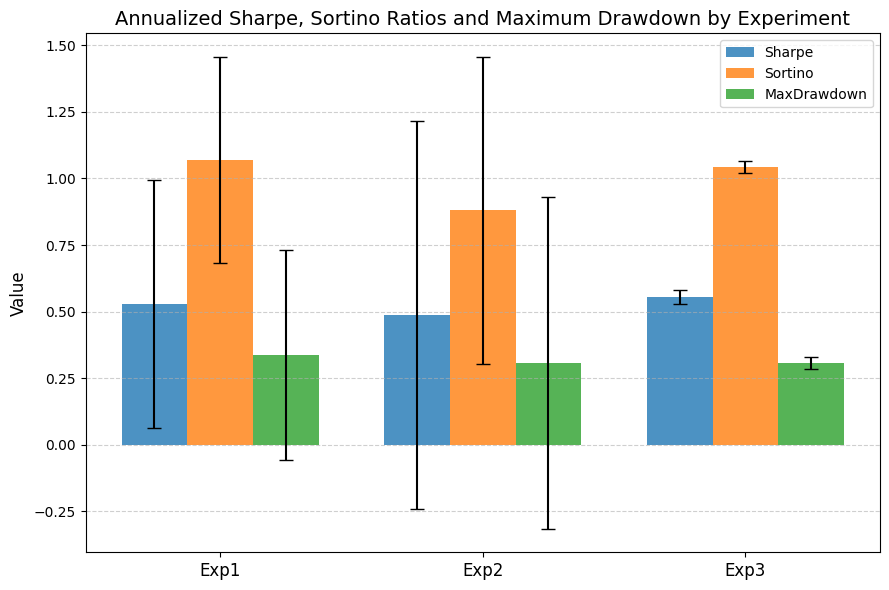

In [6]:
## Annualized Sharpe, Sortino Ratios and Maximum Drawdown by Experiment
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data you provided
means = pd.DataFrame({
    "Experiment": ["Exp1", "Exp2", "Exp3"],
    "Sharpe": [0.5296618855, 0.4858588472, 0.5561857223],
    "Sortino": [1.06860346, 0.8801766673, 1.041713945],
    "MaxDrawdown": [0.3367272114, 0.3084803642, 0.3064817778]
})

sem = pd.DataFrame({
    "Experiment": ["Exp1", "Exp2", "Exp3"],
    "Sharpe": [0.4658627565, 0.7285910186,	0.02641339531],
    "Sortino": [0.3871699287,	0.5758685719,	0.02282653266],
    "MaxDrawdown": [0.3940691395,	0.6233030098,	0.02355146625]
})


# Experiments
experiments = means["Experiment"]
x = np.arange(len(experiments))  # positions for groups

# Metrics to plot
metrics = ["Sharpe", "Sortino", "MaxDrawdown"]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]

# Width of each bar
bar_width = 0.25

# Plot
fig, ax = plt.subplots(figsize=(9,6))

for i, metric in enumerate(metrics):
    ax.bar(x + i*bar_width,
           means[metric],
           width=bar_width,
           yerr=sem[metric],  # standard error
           capsize=5,
           label=metric,
           color=colors[i],
           alpha=0.8)

# Formatting
ax.set_xticks(x + bar_width)
ax.set_xticklabels(experiments, fontsize=12)
ax.set_ylabel("Value", fontsize=12)
ax.set_title("Annualized Sharpe, Sortino Ratios and Maximum Drawdown by Experiment", fontsize=14)
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


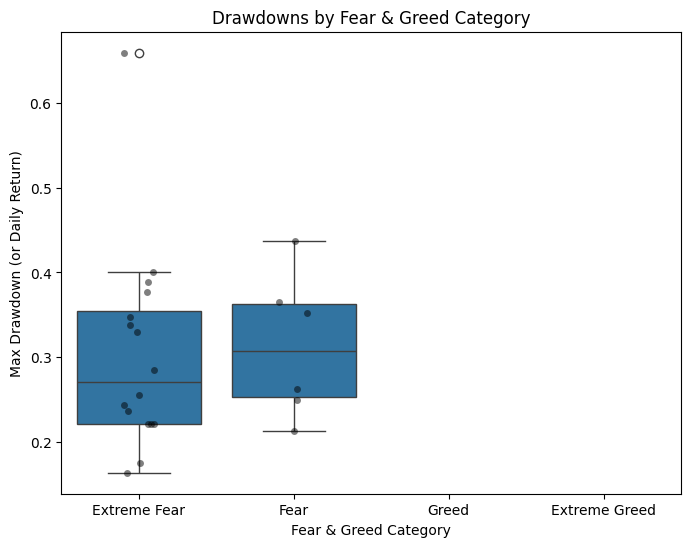

,FearGreed,Drawdown,Category
0,0.219556,0.376758,Extreme Fear
1,0.038444,0.285392,Extreme Fear
2,-0.441556,0.388258,Extreme Fear
3,-0.336552,0.221560,Extreme Fear
4,-0.661798,0.659414,Extreme Fear
5,-0.542472,0.400783,Extreme Fear
6,-0.474444,0.221635,Extreme Fear
7,-0.485778,0.329301,Extreme Fear
8,-0.178222,0.338121,Extreme Fear
9,0.119770,0.236547,Extreme Fear


In [9]:
""" Phase 3, threshold analysis """
""" NOTE: at window level and Looses daily value """
from report.utils.graphic_helpers import plot_drawdowns_by_sentiment

sentiment_results =  os.path.join(reporting_data_path, "performance_metrics.csv")
sentiment_results_df =  pd.read_csv(sentiment_results)

fg_values_norm = sentiment_results_df["fear_greed_norm_mean"]
maxdrawdown = sentiment_results_df["Exp.3a-max_drawdown"]

plot_drawdowns_by_sentiment(fg_values_norm, maxdrawdown)

In [ ]:
""" ..CONT. Phase 3, threshold analysis
TODO: "analyze daily return volatility or drawdown progression day-by-day."
"""

sentiment_daily_results =  os.path.join(reporting_results_path, "normalized_sen_correlations.csv")
sentiment_daily_results_df =  pd.read_csv(sentiment_daily_results)

fg_values_norm = sentiment_daily_results_df["fear_greed_norm"]
daily_returns = sentiment_daily_results_df["daily_returns"]


In [12]:
""" Phase-2 Correlations """
voltur_corr_df = pd.read_csv(voltur_corr_file)

voltur_corr_summary = voltur_corr_df.groupby("pair")["value"].agg(
    mean="mean",
    min="min",
    max="max",
    std="std",
    n="count"
).reset_index()

print("Phase-2 Correlations for Turbulence & Volatility")
print(voltur_corr_summary)


Phase-2 Correlations for Turbulence & Volatility
                        pair      mean       min       max       std   n
0  daily_return ~ turbulence  0.143118 -0.419556  0.552887  0.234835  22
1  daily_return ~ volatility -0.003658 -0.212924  0.301539  0.106099  22
2    turbulence ~ volatility  0.116309 -0.063683  0.330444  0.114913  22


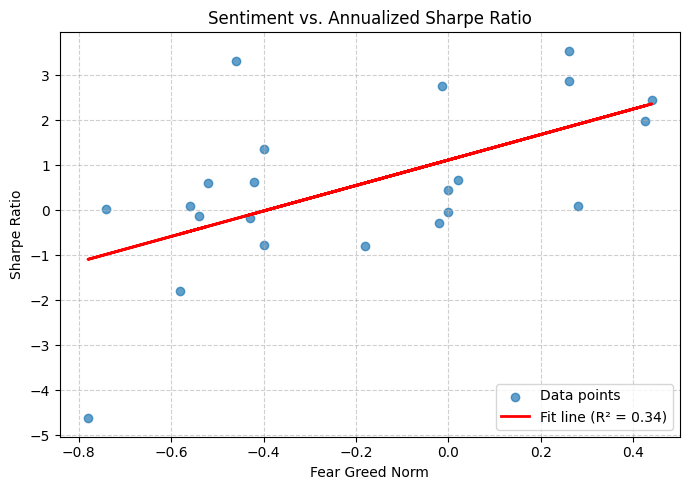

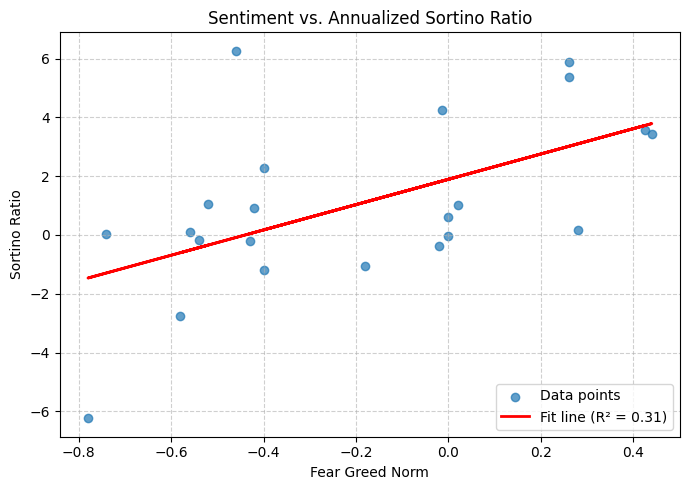

In [4]:
""" SCATTER PLOT – Sentiment vs. Sharpe/Sortino """

from report.utils.scatter_plot import plot_scatter_with_regression
exp3_performance_file = os.path.join(reporting_data_path, "sentiment_vs_sharp_and_sortino.csv")
exp3_performance_df = pd.read_csv(exp3_performance_file)

# scatter of sentiment vs Sharpe
plot_scatter_with_regression(exp3_performance_df, "fear_greed_norm", "sharpe_ratio", 
                             title="Sentiment vs. Annualized Sharpe Ratio")

# scatter of sentiment vs Sortino
plot_scatter_with_regression(exp3_performance_df, "fear_greed_norm", "sortino_ratio", 
                             title="Sentiment vs. Annualized Sortino Ratio")

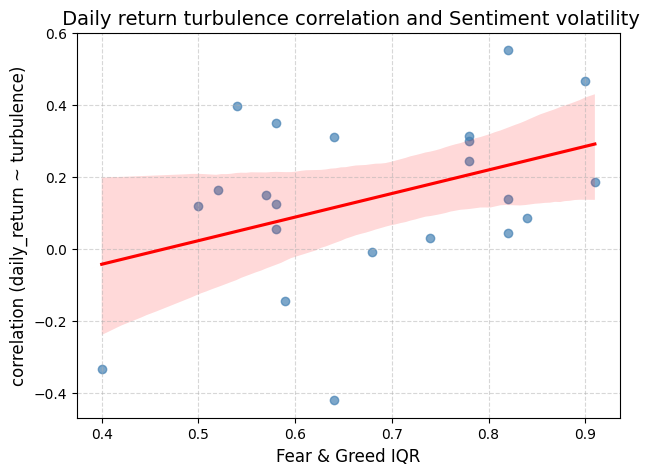

In [4]:
""" SCATTER PLOT """
# DAILY RETURN TURBULENCE CORRELATION* and SENTIMENT VOLATILITY 
# *voltur_corr_file and fear&greed IQR data

from report.utils.graphic_helpers import correlation_scatter

correlations_file = os.path.join(reporting_data_path, "turbulence_and_sentiment.csv")
correlations_df = pd.read_csv(correlations_file)

# column names:
# window	Correlations (daily_return ~ turbulence)	FG_Mean	FG_Volatility	FG_IQR

fg_IQR_X = correlations_df["FG-IQR"]
turb_Y = correlations_df["Turb-correlations"]

correlation_scatter(fg_IQR_X, turb_Y, "Fear & Greed IQR", "correlation (daily_return ~ turbulence)", " Daily return turbulence correlation and Sentiment volatility")

In [16]:
""" Correlations result with regressions """
# correlations_df / turbulence_and_sentiment.csv column names:
# window	Correlations (daily_return ~ turbulence)	FG_Mean	FG_Volatility	FG_IQR
from report.utils.regressions_common import run_simple_regression, run_multiple_regression, regression_summary_table

correlations_file = os.path.join(reporting_data_path, "turbulence_and_sentiment.csv")
correlations_df = pd.read_csv(correlations_file)

# Bivariate regression with window level values- Turb-correlations	and
# fear & greed (individually) mean (model1) , std(model2) and IQR data (model3)

# Regression: Turbulence correlations and Fear & Greed 
model1 = run_simple_regression(correlations_df, "Turb-correlations", "FG-Mean")
summary1 = regression_summary_table(model1, model_name="Turb. correlations - Fear&Greed (Mean)")

model2 = run_simple_regression(correlations_df, "Turb-correlations", "FG-Volatility")
summary2 = regression_summary_table(model2, model_name="Turb. correlations  - Fear&Greed (Std)")

model3 = run_simple_regression(correlations_df, "Turb-correlations", "FG-IQR")
summary3 = regression_summary_table(model3, model_name="Turb. correlations - Fear&Greed (IQR)")

all_summaries = pd.concat([summary1, summary2], ignore_index=True)
# Display 
import IPython.display as display
display.display(summary1)
display.display(summary2)
display.display(summary3)

# full results
# display.display(model1.summary())
# display.display(model2.summary())
# display.display(model3.summary())



,Model,Variable,coef,std err,t,p>|t|,[0.025,0.975]
0,Turb. correlations - Fear&Greed (Mean),Intercept,0.1927,0.0644,2.99,0.0028,0.0665,0.3188
1,Turb. correlations - Fear&Greed (Mean),Q('FG-Mean'),0.3861,0.4511,0.86,0.392,-0.498,1.2702
2,Turb. correlations - Fear&Greed (Mean),R-squared,0.0500,,,,,
3,Turb. correlations - Fear&Greed (Mean),Adj. R-squared,0.0030,,,,,


,Model,Variable,coef,std err,t,p>|t|,[0.025,0.975]
0,Turb. correlations - Fear&Greed (Std),Intercept,0.5559,1.2947,0.43,0.6677,-1.9816,3.0934
1,Turb. correlations - Fear&Greed (Std),Q('FG-Volatility'),-1.0180,3.2445,-0.31,0.7537,-7.3772,5.3412
2,Turb. correlations - Fear&Greed (Std),R-squared,0.0090,,,,,
3,Turb. correlations - Fear&Greed (Std),Adj. R-squared,-0.0400,,,,,


,Model,Variable,coef,std err,t,p>|t|,[0.025,0.975]
0,Turb. correlations - Fear&Greed (IQR),Intercept,-0.3038,0.2701,-1.12,0.2607,-0.8332,0.2256
1,Turb. correlations - Fear&Greed (IQR),Q('FG-IQR'),0.6550,0.3684,1.78,0.0754,-0.0671,1.3771
2,Turb. correlations - Fear&Greed (IQR),R-squared,0.1590,,,,,
3,Turb. correlations - Fear&Greed (IQR),Adj. R-squared,0.1170,,,,,


In [4]:
""" REGRESSION COMMON  """

from report.utils.regressions_common import run_simple_regression, run_multiple_regression, regression_summary_table
import IPython.display as display


In [7]:
""" Exp.1 - Control group 
Note: ignore Regression results for the Control Group
"""
# agent,Window,Sharpe_ann,Sortino_ann,Volatility_ann,Max_Drawdown,Total_Return_ann,Turbulence_ann, FG_norm_Std	
perf_metrics_ctrl = os.path.join(reporting_data_path, "phase-1_reg.csv")
ctrl_performance_df = pd.read_csv(perf_metrics_ctrl)

"""    Temp note : avoid adding to many ind-vars : overfitting or multicollinearity """ 

simp_reg_phase1_vol = run_simple_regression(ctrl_performance_df, "Sharpe_ann", "Volatility_ann")
simp_reg_phase1_fg = run_simple_regression(ctrl_performance_df, "Sharpe_ann", "FG_norm_Std")

# Full result
display.display(simp_reg_phase1_vol.summary())
display.display(simp_reg_phase1_fg.summary())

summary_phase1_vol = regression_summary_table(simp_reg_phase1_vol)
summary_phase1_fg = regression_summary_table(simp_reg_phase1_fg)

display.display(summary_phase1_vol)
display.display(summary_phase1_fg)


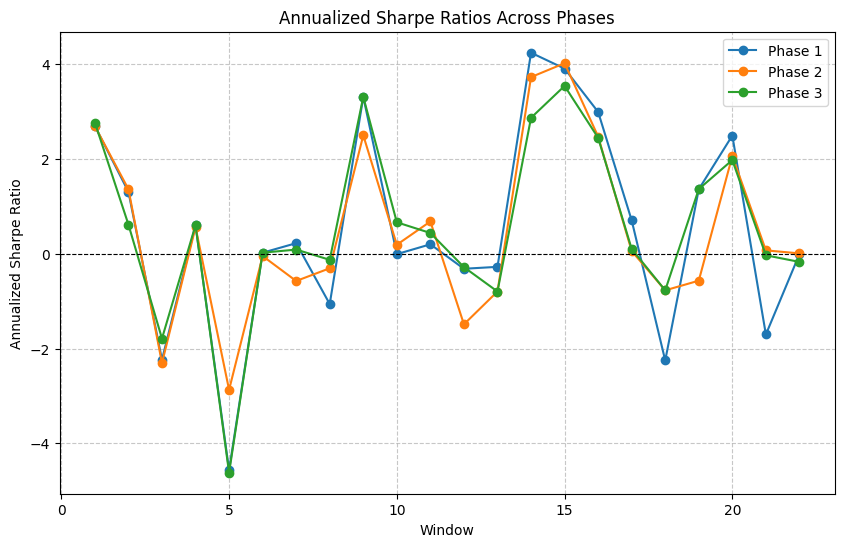

In [2]:
""" PHASE 1-3 - Time Series plot """
from report.utils.graphic_helpers import plot_sharpe_across_phases
#columns : window	date range	phase sharp_ann

perf_metrics = os.path.join(reporting_data_path, "performance_metrics_flat.csv")
performance_df = pd.read_csv(perf_metrics)

plot_sharpe_across_phases(performance_df)



In [21]:
""" Exp 2  Regression- Volatility_30 & Turbulence_60 trained agent """
""" Single regressions due to similarity of the variables """
# 2_reg column names:
# agent,Window,Sharpe_ann,Sortino_ann,Volatility_ann,Max_Drawdown,Total_Return_ann,Turbulence_ann,FG_norm_Std,FG_norm_IQR

phase2_datafile = os.path.join(reporting_data_path, "phase-2_reg.csv")
ft_performance_df = pd.read_csv(phase2_datafile)

# replace Sharpe_ann for Sortino_ann and Max_Drawdown , (Total_Return_ann)
""" multiple regression """
dependent2_var = "Sortino_ann"
independent2_vars = ["Volatility_ann", "Turbulence_ann"]
# reg_phase2= run_multiple_regression(ft_performance_df,  dependent2_var, independent2_vars)
reg_phase2 = run_simple_regression(ft_performance_df, dependent2_var, "Turbulence_ann")
summary_phase2 = regression_summary_table(reg_phase2)

display.display(reg_phase2.summary())

# reduced results
display.display(summary_phase2)




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Q('Sortino_ann')   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                    0.8623
Date:                Mon, 15 Sep 2025   Prob (F-statistic):              0.364
Time:                        12:01:50   Log-Likelihood:                -51.212
No. Observations:                  22   AIC:                             106.4
Df Residuals:                      20   BIC:                             108.6
Df Model:                           1                                         
Covariance Type:                  HC3                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.8900      3.811     -0.758      0.448     -10.359       4.579
Q('Turbulence_ann')     0.5914      0.637      0.929      0.353      -0.657       1.840
==============================================================================
Omnibus:                        0.104   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.949   Jarque-Bera (JB):                0.036
Skew:                           0.003   Prob(JB):                        0.982
Kurtosis:                       2.801   Cond. No.                         28.9
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

,Model,Variable,coef,std err,t,p>|t|,[0.025,0.975]
0,Model,Intercept,-2.8900,3.8106,-0.76,0.4482,-10.3586,4.5786
1,Model,Q('Turbulence_ann'),0.5914,0.6369,0.93,0.3531,-0.6568,1.8396
2,Model,R-squared,0.1160,,,,,
3,Model,Adj. R-squared,0.0720,,,,,


In [ ]:
""" Exp 3  Regression - Fear & Greed data trained agent """
# phase-3_reg.csv column names:
# agent,Window,Sharpe_ann,Sortino_ann,Volatility_ann,Max_Drawdown,Total_Return_ann,FG_raw_mean,FG_norm_mean,FG_norm_Std,FG_norm_IQR


phase3_datafile = os.path.join(reporting_data_path, "phase-3_reg.csv")
fg_performance_df = pd.read_csv(phase3_datafile)

# replace Sharpe_ann for Sortino_ann and Max_Drawdown , (Total_Return_ann)

dependent3_var = "Sharpe_ann"

reg_phase3 = run_simple_regression(fg_performance_df, dependent3_var, "Turbulence_ann")
summary_phase2 = regression_summary_table(reg_phase2)

display.display(reg_phase2.summary())

# reduced results
display.display(summary_phase2)

In [7]:
""" Compare Sharp accros Experiments 
Note: not part of the dissertation
"""

from report.utils.graphic_helpers import summarize_sharpe_differences
perf_metrics = os.path.join(reporting_data_path, "performance_metrics_flat.csv")
performance_df = pd.read_csv(perf_metrics)

summary_df = summarize_sharpe_differences(performance_df)
# print(summary_df.to_csv(index=False))
# # to view here use:
print(summary_df.to_string(index=False))

 window  best_phase  worst_phase  best_sharpe best_category  worst_sharpe worst_category     diff          comparison
      1           3            2     2.770902     very good      2.692746      very good 0.078156             similar
      2           2            3     1.363441          good      0.617267     suboptimal 0.746174    large difference
      3           3            2    -1.789555      negative     -2.308020       negative 0.518465    large difference
      4           1            2     0.606049    suboptimal      0.561565     suboptimal 0.044484             similar
      5           2            3    -2.871837      negative     -4.622236       negative 1.750399    large difference
      6           1            2     0.022930    suboptimal     -0.047239       negative 0.070169             similar
      7           1            2     0.223873    suboptimal     -0.574455       negative 0.798328    large difference
      8           3            1    -0.127354      negat

In [9]:
# display.display(reg_phase2.summary())

In [26]:
""" Experiment 3 Regressions with processed data"""
# phase-3_reg.csv column names:
# agent,Window,Sharpe_ann,Sortino_ann,Volatility_ann,Max_Drawdown,Total_Return_ann,FG_raw_mean,FG_norm_mean,FG_norm_Std,FG_norm_IQR


phase3_datafile = os.path.join(reporting_data_path, "phase-3a_reg.csv")
sen_performance_df = pd.read_csv(phase3_datafile)

""" simple regression """
dependent3_var = "Max_Drawdown"
independent3_vars = ["FG_raw_mean", "FG_norm_mean", "FG_norm_Std", "FG_norm_IQR"]

reg_phase3_raw= run_simple_regression(sen_performance_df,  dependent3_var, "FG_norm_mean")
summary_phase3_raw = regression_summary_table(reg_phase3_raw)

display.display(reg_phase3_raw.summary())

# # reduced results
display.display(summary_phase3_raw)

# reg_phase3_std= run_simple_regression(sen_performance_df,  dependent3_var, "FG_norm_Std")
# summary_phase3_std = regression_summary_table(reg_phase3_std)

# display.display(reg_phase3_std.summary())


# # reduced results
# display.display(summary_phase3_std)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Q('Max_Drawdown')   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                    0.5954
Date:                Mon, 15 Sep 2025   Prob (F-statistic):              0.449
Time:                        12:27:12   Log-Likelihood:                 18.593
No. Observations:                  22   AIC:                            -33.19
Df Residuals:                      20   BIC:                            -31.00
Df Model:                           1                                         
Covariance Type:                  HC3                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.3029      0.024     12.572      0.000       0.256       0.350
Q('FG_norm_mean')    -0.0874      0.113     -0.772      0.440      -0.309       0.135
==============================================================================
Omnibus:                        6.870   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                4.539
Skew:                           0.994   Prob(JB):                        0.103
Kurtosis:                       4.001   Cond. No.                         3.01
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

,Model,Variable,coef,std err,t,p>|t|,[0.025,0.975]
0,Model,Intercept,0.3029,0.0241,12.57,0.0,0.2557,0.3502
1,Model,Q('FG_norm_mean'),-0.0874,0.1133,-0.77,0.4403,-0.3095,0.1346
2,Model,R-squared,0.0730,,,,,
3,Model,Adj. R-squared,0.0260,,,,,
